In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
from rsnn.firing_sequences.sampling import backward_filtering_forward_sampling
from rsnn.firing_sequences.utils import get_cardinality, count_predictable, is_predictable

In [3]:
B, L, N, Tr = 10000, 10, 6, 3
firing_sequences = backward_filtering_forward_sampling(B, L, N, Tr)

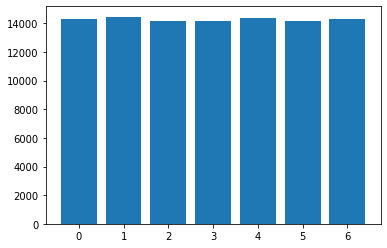

In [4]:
# check uniformity
unique, counts = (firing_sequences.view(B*L, N) * torch.pow(2, torch.arange(N))).sum(dim=1).unique(return_counts=True)
plt.bar(torch.arange(unique.size(0)), counts)
plt.show()

In [5]:
# check cardinality
print(f"{unique.size(0)} different sequences out of {get_cardinality(N, Tr, cyclic=True):0.0f} has been sampled")

7 different sequences out of 7 has been sampled


In [10]:
# predictability
B, L, N, Tr = 10000, 30, 100, 10
firing_sequences = backward_filtering_forward_sampling(B, L, N, Tr)
print(f"{count_predictable(firing_sequences, Tr)} sequences out of {B} are predictable")

10000 sequences out of 10000 are predictable


In [7]:
B, L, N, Tr = 1, 30, 100, 10
firing_sequences = backward_filtering_forward_sampling(B, L, N, Tr)
print("the sequence is", "predictable" if is_predictable(firing_sequences, Tr) else "not predictable")

the sequence is predictable
